# Tutorial 1 - Driven Filter Circuit
This notebook is a simple tutorial on how to use the julia package ```BondGraphs``` to simulate a driven filter circuit.

This work is based on the Python tutorial for BondGraphTools, which can be found here: https://bondgraphtools.readthedocs.io/en/latest/tutorials/RC.html

In [160]:
# Since BondGraphs is not yet in the package manager, we will need to include it locally from the dev folder
push!(LOAD_PATH, "C:/Users/jedfo/.julia/dev/BondGraphs/src/")
using BondGraphs

In [161]:
using Plots
using ModelingToolkit

In [162]:
model = BondGraph("RC")

BondGraph BG:RC (0 Nodes, 0 Bonds)

In [163]:
C = Component(:C)
R = Component(:R)
zero_law = EqualEffort()
C, R, zero_law

(C:C, R:R, 0)

In [164]:
add_node!(model, [C, R, zero_law])

In [165]:
connect!(model, R, zero_law)
connect!(model, C, zero_law)

Bond C:C ⇀ 0

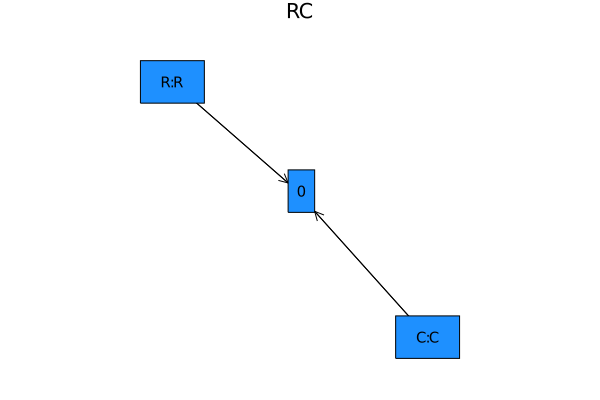

In [166]:
plot(model, nodecolor=:dodgerblue, fontsize=10)

In [167]:
BondGraphs.equations(model)

1-element Vector{Equation}:
 Differential(t)(C₊q(t)) ~ -C₊q(t)*(C₊C^-1)*(R₊R^-1)

In [168]:
set_parameter!(C, :C, 1.0)
set_parameter!(R, :R, 1.0)

1.0

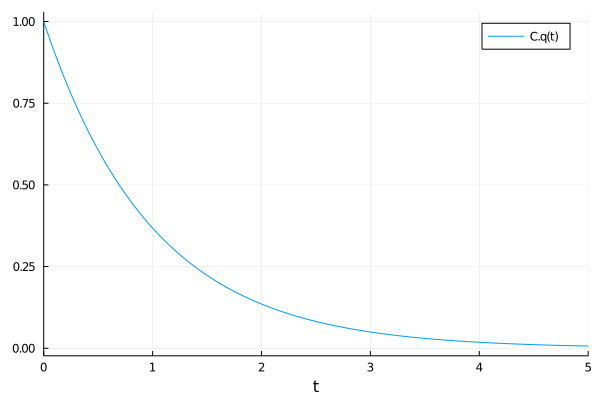

In [169]:
tspan = (0., 5.)
u0 = [1]
sol = simulate(model, tspan; u0)
plot(sol)

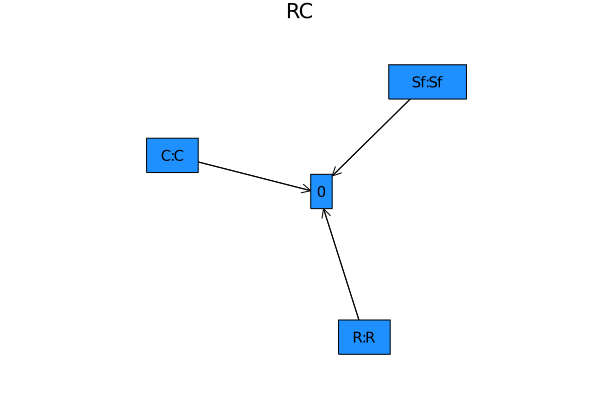

In [170]:
Sf = Component(:Sf)
add_node!(model, Sf)
connect!(model, Sf, zero_law)
plot(model, nodecolor = :dodgerblue, fontsize = 10)

In [171]:
BondGraphs.equations(model)

1-element Vector{Equation}:
 Differential(t)(C₊q(t)) ~ -*Sf₊f - (C₊q(t)*(C₊C^-1)*(R₊R^-1))

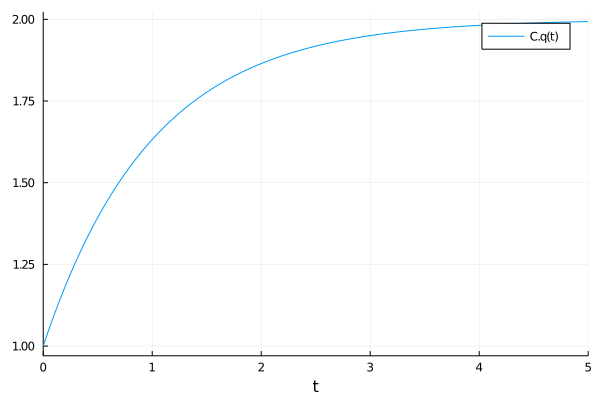

In [172]:
set_parameter!(Sf, :f, -2.) # opposite direction, due to sign in the equations
tspan = (0., 5.)
u0 = [1]
sol = simulate(model, tspan; u0)
plot(sol)